# FAIR simple climate-carbon-cycle model

This is a document designed as a quick start guide for someone already proficient in Python to show them how to use the different functions in the FAIR climate model package and plot results. We begin with the imports and then move on to use the forward functions to run an emissions profile through to find concentrations and temperature responses. We then re-calculate the original emissions profile using the inverse functions, plotting the 2 results to compare them.

We then go on to define a step function in emissions and calcualte the climate response, and then invert this temperature response to find a compatible emissions time series as before. We go further in the next section and find an alternate CO$_2$ emissions time series for the temperature response to a step function in emissions assuming there is some additional contributer to the radiative forcing. We plot the results and make comparisons. 

In [1]:
# Import numpy (maths package for python)
import numpy as np

# Import plotting and set style
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['lines.linewidth'] = 1.5

font = {'weight' : 'normal',
          'size'   : 16}

plt.rc('font', **font)

# Import FAIR functions
from FAIR_update import fair_scm as fair_forward
from FAIR_update import temp_to_forcing as fair_inverse_t_2_rf
from FAIR_update import forcing_to_conc as fair_inverse_rf_2_c
from FAIR_update import conc_to_emissions as fair_inverse_c_2_e

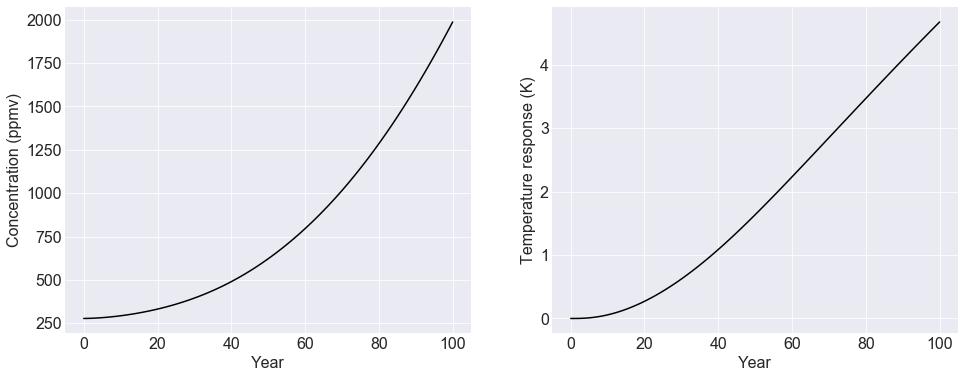

In [2]:
# Using FAIR forward code and a linear increase in CO2 emissions from 0 to 100 GtC 
    # over a 100 year period we calculate the FAIR derived CO2 concentration response 
    # (ppmv) and the temperature response (K). 

emissions = np.arange(0,101,1)

C, T = fair_forward(emissions=emissions)

#make plots and make them visually attractive
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(np.arange(0,emissions.size),C, color = 'black')
ax1.set_xlabel('Year')
ax1.set_ylabel('Concentration (ppmv)')

ax2.plot(np.arange(0,emissions.size),T, color = 'black')
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature response (K)')
plt.show()

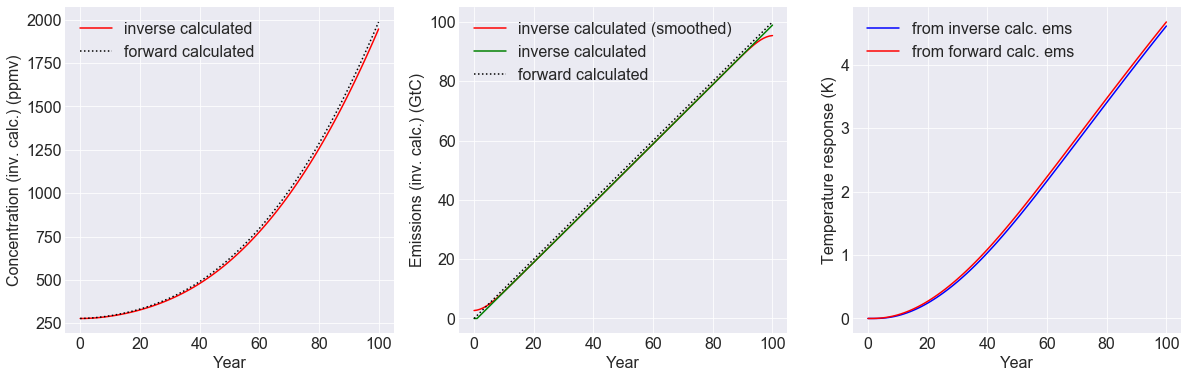

In [3]:
# Using FAIR inverse code we calculate the CO2 concentration time series and emissions 
    # timeseries and compare to the original data input.

RF = fair_inverse_t_2_rf(T_in=T)
C_inv = fair_inverse_rf_2_c(RF_in=RF)
E_inv, E_inv_smooth = fair_inverse_c_2_e(co2_conc=C_inv, T_input=T)

# use E_inv to recalculate temperature 
C_final, T_final = fair_forward(emissions=E_inv)


# make plots and make them visually attractive.
fig2 = plt.figure(figsize = (20,6))
ax21 = fig2.add_subplot(131)
ax22 = fig2.add_subplot(132)
ax23 = fig2.add_subplot(133)

ax21.plot(np.arange(0,RF.size), C_inv, color = 'red', label = 'inverse calculated')
ax21.plot(np.arange(0,RF.size), C, color = 'black', linestyle = ':', label = 'forward calculated')
ax21.set_xlabel('Year')
ax21.set_ylabel('Concentration (inv. calc.) (ppmv)')
ax21.legend(loc = 'upper left')

ax22.plot(np.arange(0,RF.size), E_inv_smooth, color = 'red', label = 'inverse calculated (smoothed)')
ax22.plot(np.arange(0,RF.size), E_inv, color = 'green', label = 'inverse calculated')
ax22.plot(np.arange(0,RF.size), emissions, color = 'black', linestyle = ':', label = 'forward calculated')
ax22.set_xlabel('Year')
ax22.set_ylabel('Emissions (inv. calc.) (GtC)')
ax22.legend(loc = 'upper left')

ax23.plot(np.arange(0,T_final.size), T_final, color = 'blue', label = 'from inverse calc. ems')
ax23.plot(np.arange(0,T_final.size), T, color = 'red', label = 'from forward calc. ems')
ax23.set_xlabel('Year')
ax23.set_ylabel('Temperature response (K)')
ax23.legend(loc = 'upper left')
plt.show()

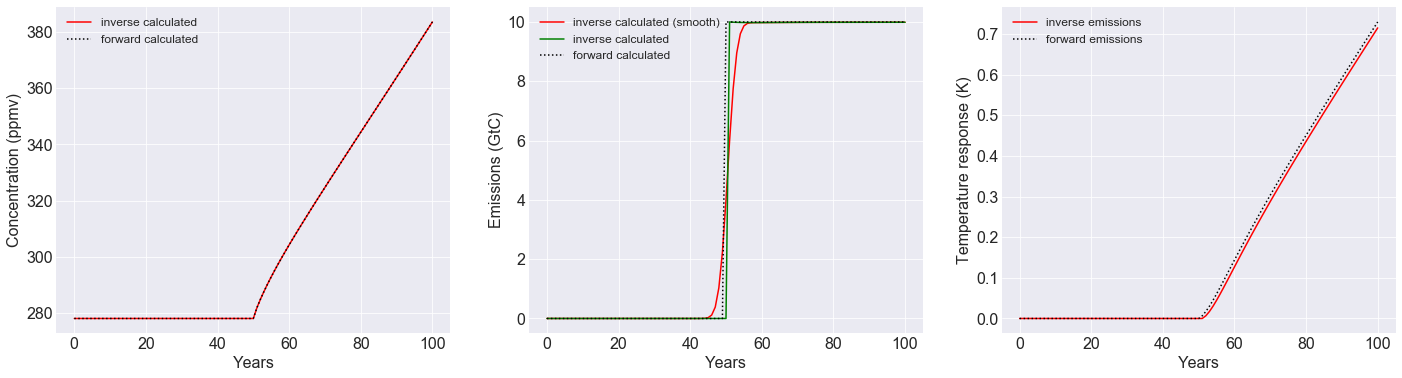

In [4]:
# # ------------------------------------------------ # #
# same calculation but with step function emissions.

emissions = np.zeros(101)
emissions[50:] = 10.0

C_for_step, T_for_step = fair_forward(emissions=emissions)
RF_inv_step = fair_inverse_t_2_rf(T_in=T_for_step)
C_inv_step = fair_inverse_rf_2_c(RF_in=RF_inv_step)
E_inv_step, E_inv_step_smooth = fair_inverse_c_2_e(co2_conc=C_inv_step, T_input=T_for_step, year_smoothing=2)
C_spare, T_inv_step = fair_forward(emissions=E_inv_step)


# make plots and make them visually attractive.
fig3 = plt.figure(figsize=(24,6))
ax1 = fig3.add_subplot(131)
ax2 = fig3.add_subplot(132)
ax3 = fig3.add_subplot(133)

ax1.plot(np.arange(0,101), C_inv_step, color = 'red', label = 'inverse calculated')
ax1.plot(np.arange(0,101), C_inv_step, color = 'black', linestyle = ':', label = 'forward calculated')
ax1.legend(loc = 'upper left', fontsize = 12)
ax1.set_xlabel('Years')
ax1.set_ylabel('Concentration (ppmv)')

ax2.plot(np.arange(0,101), E_inv_step_smooth, color = 'red', label = 'inverse calculated (smooth)')
ax2.plot(np.arange(0,101), E_inv_step, color = 'green', label = 'inverse calculated')
ax2.plot(np.arange(0,101), emissions, color = 'black', linestyle = ':', label = 'forward calculated')
ax2.legend(loc = 'upper left', fontsize = 12)
ax2.set_xlabel('Years')
ax2.set_ylabel('Emissions (GtC)')

ax3.plot(np.arange(0,101), T_inv_step, color = 'red', label = 'inverse emissions')
ax3.plot(np.arange(0,101), T_for_step, color = 'black', linestyle = ':', label = 'forward emissions')
ax3.legend(loc = 'upper left', fontsize = 12)
ax3.set_xlabel('Years')
ax3.set_ylabel('Temperature response (K)')
plt.show()

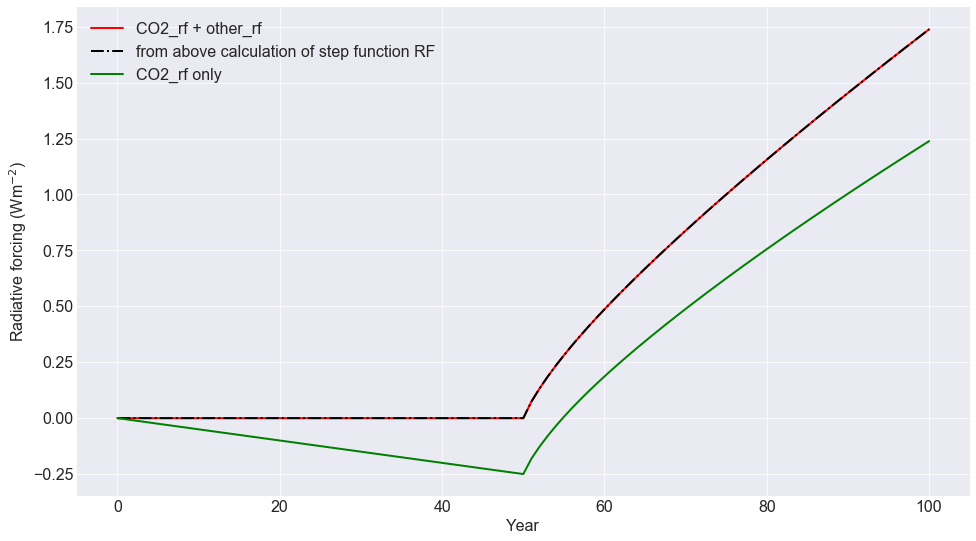

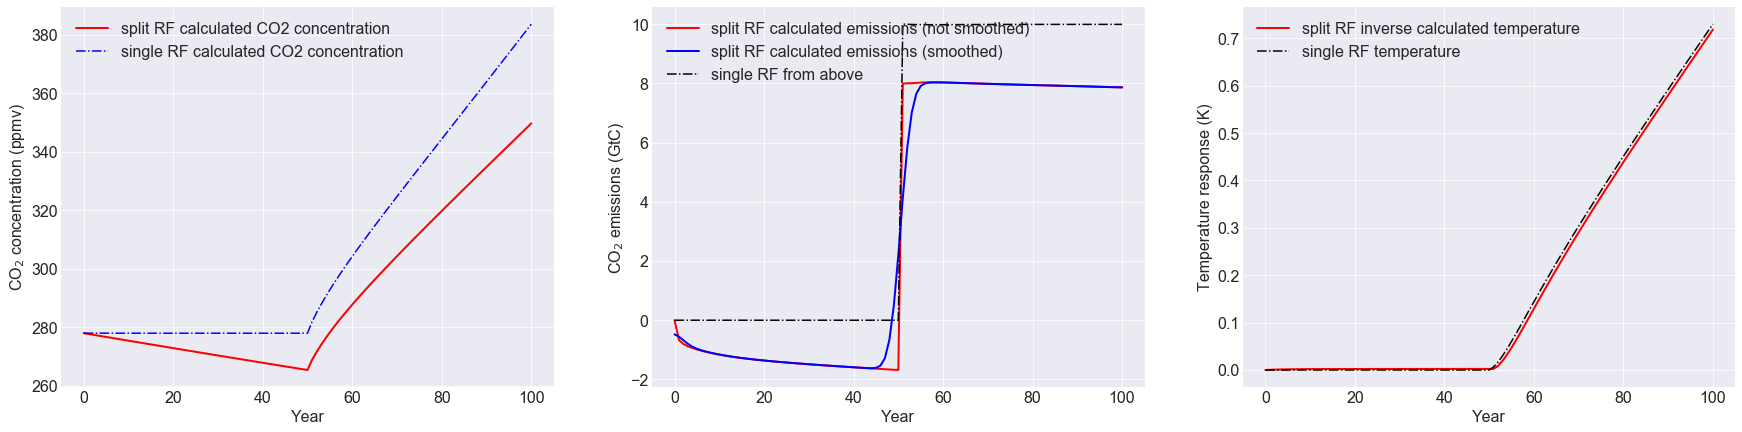

In [5]:
# # ---------------------------------------- # #
# Complete same temperature response as before but now say some of the RF comes from an non-CO2
    # source. Plot including an other RF input.

other_rf = np.zeros(T_for_step.size)
for i in range(0,101):
    other_rf[i] = i/200.

RF_without_other_rf_input = fair_inverse_t_2_rf(T_in=T_for_step, other_rf=other_rf, other_rf_in = True)

# Plot the RF profile we found before and with other_rf included as constant value of 1 Wm^{-2}.
    # We plot the sum of other_rf and the co2 contribution to RF, showing they give the same as 
    # simply RF_inv_step from above.
plt.plot(RF_without_other_rf_input + other_rf, color = 'red', linewidth = 2, label = 'CO2_rf + other_rf')
plt.plot(RF_inv_step, color = 'black', linestyle = '-.', linewidth = 2, label = 'from above calculation of step function RF')
plt.plot(RF_without_other_rf_input, color = 'green', linewidth = 2, label = 'CO2_rf only')
plt.xlabel('Year')
plt.ylabel('Radiative forcing (Wm$^{-2}$)')
plt.legend(loc = 'best')

#-----------------

# and now finding compatible CO2 concentrations...
CO2_conc_other_rf = fair_inverse_rf_2_c(RF_in=RF_without_other_rf_input)
ems_CO2_other_rf, ems_CO2_other_rf_smoothed = fair_inverse_c_2_e(co2_conc=CO2_conc_other_rf, T_input=T_for_step, year_smoothing=2)

# recalculate Temperature response and compare to earlier result where all of RF is CO2_RF
C_test, T_test = fair_forward(emissions=ems_CO2_other_rf, other_rf=other_rf)

#plot results and make them look appealing
fig = plt.figure(figsize = (30,7))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(np.arange(0,T_for_step.size), CO2_conc_other_rf, color = 'red', linewidth = 2, label = 'split RF calculated CO2 concentration')
ax1.plot(np.arange(0,T_for_step.size), C_inv_step, color = 'blue', linestyle = '-.', label = 'single RF calculated CO2 concentration')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO$_2$ concentration (ppmv)')
ax1.legend(loc = 'best')

ax2.plot(np.arange(0,T_for_step.size), ems_CO2_other_rf, linewidth = 2, color = 'red', label = 'split RF calculated emissions (not smoothed)')
ax2.plot(np.arange(0,T_for_step.size), ems_CO2_other_rf_smoothed, linewidth = 2, color = 'blue', label = 'split RF calculated emissions (smoothed)')
ax2.plot(np.arange(0,T_for_step.size), E_inv_step, color = 'black', linestyle = '-.', label = 'single RF from above')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO$_2$ emissions (GtC)')
ax2.legend(loc = 'upper left')

ax3.plot(np.arange(0,T_for_step.size), T_test, linewidth = 2, color = 'red', label = 'split RF inverse calculated temperature')
ax3.plot(np.arange(0,T_for_step.size), T_for_step, color = 'black', linestyle = '-.', label = 'single RF temperature')
ax3.set_xlabel('Year')
ax3.set_ylabel('Temperature response (K)')
ax3.legend(loc = 'upper left')
plt.show()